![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)
This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from interpolation import lagrange_v as lagrange, nodal

# Polinômios de Chebyshev

Mas, a priori, nada nos obriga a usar pontos equiespaçados para calcular a função.
Dependendo de como os dados $y_i$ serão obtidos, talvez seja possível usar outros pontos $x_i$,
que produzam um polinômio nodal "menor".
Assim, gostaríamos de resolver o seguinte

** Problema de otimização dos nós de interpolação**:
Achar pontos $x_0$, $x_1$, $\ldots$, $x_n$ no intervalo $[-1,1]$ de forma a minimizar o polinômio nodal
$$ \prod_{i = 0}^{n+1} (x - x_i). $$

### Exercício:

Resolva o caso $n = 1$.

Queremos minimizar (em $a$ e $b$) o máximo do valor absoluto de $(x-a)(x-b)$ onde $x$ percorre o intervalo $[-1,1]$.
Fixados $a$ e $b$, há três candidatos para o máximo: $x = -1$, $x = 1$, $x = (a+b)/2$. (porquê?)
O valor nestes três pontos é
- $(a+1)(b+1)$
- $(1-a)(1-b)$
- $(b-a)^2/4$

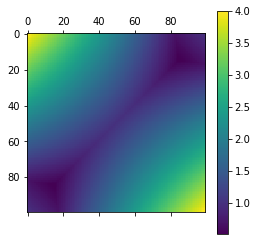

In [3]:
def nodalmax(a,b):
    ### Resposta aqui


a = np.linspace(-1,1,100)
b = np.linspace(-1,1,100)

plt.matshow([[nodalmax(x,y) for x in a] for y in b])
# Pense se é possível "vetorizar"
plt.colorbar()
plt.show()

Pense porquê o gráfico abaixo ajuda a resolver o problema.

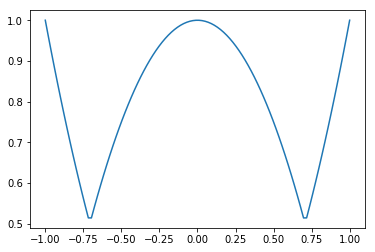

In [4]:
plt.plot(a, [nodalmax(x,-x) for x in a])
plt.show()

Conclua.

## Caso geral: pontos "trigonométricos"!

É possível mostrar que, ao escolher os pontos $x_i = \cos\left(\pi\frac{2i + 1}{2(n+1)}\right)$,
o polinômio nodal será o menor possível.

Observação: esta escolha não minimiza o _fator de distorção_ visto anteriormente; este é um problema bem mais difícil...

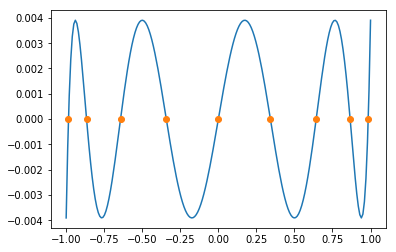

In [5]:
n = 8
ang = np.pi*np.arange(1,2*n+3,2)/(2*(n+1))
x = np.cos(ang)
P = nodal(x)

t = np.linspace(-1,1,200)
plt.plot(t, P(t))
plt.plot(x, np.zeros_like(x), 'o')
plt.show()

Note que os nós estão mais espaçados no meio do que nos cantos.
Com isto, diminuímos o produto $\omega$ para os pontos mais externos (onde $\omega$ era maior),
o que acaba aumentando no centro.
Entretanto, fazemos isto de forma equilibrada:
os máximos locais do polinômio nodal são todos iguais!

Existe também uma outra solução, que inclui os extremos do intervalo como pontos de interpolação,
e é bastante razoável.
Neste caso, os pontos serão
$x_i = \cos\left( \pi \frac{i}{n} \right)$ para $i = 0, \ldots, n$.

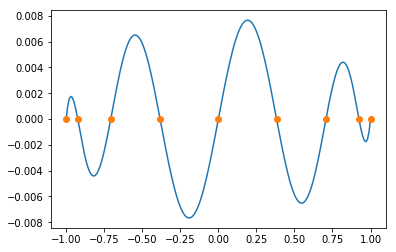

In [6]:
ang = np.pi*np.arange(0,n+1)/n
x = np.cos(ang)
P = nodal(x)

t = np.linspace(-1,1,200)
plt.plot(t, P(t))
plt.plot(x, np.zeros_like(x), 'o')
plt.show()

Observe que o máximo do polinômio nodal incluindo os extremos é maior do que o anterior:
isso é esperado, já que o polinômio de Chebyshev é o que minimiza a amplitude do polinômio nodal.

Ainda assim, temos que o polinômio nodal tende a zero bastante rápido quando $n$ aumenta,
o que garante a convergência da interpolação usando estes nós.

### Exercício

Interpole, de novo, $f(x) = \frac{1}{1 + x^2}$, mas agora usando os pontos de Chebyshev.
Observe como o erro evolui conforme usamos mais pontos para interpolar.

In [7]:
def f(x): return 1/(1 + x**2)

In [8]:
def chebyshev_nodes(a,b,n):
    """ Calcula os (n+1) pontos de Chebyshev para interpolação de ordem n """
    ### Resposta aqui


In [9]:
# Função análoga que faz gráficos da interpolação f em [a,b] com pontos de Chebyshev, usando pontos em ns
def varios_chebyshev(f,a,b,ns):
    ### Resposta aqui


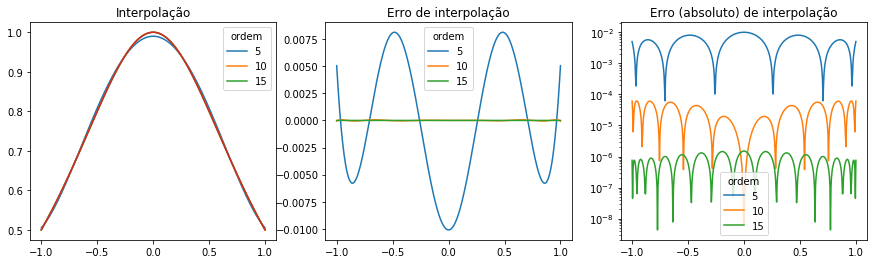

In [10]:
varios_chebyshev(f,-1,1,[5,10,15])
plt.show()

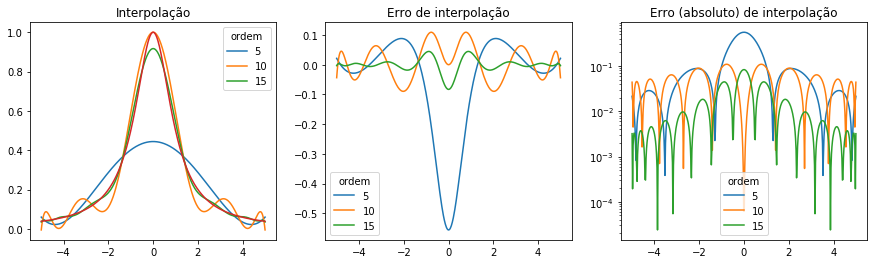

In [11]:
varios_chebyshev(f,-5,5,[5,10,15])
plt.show()

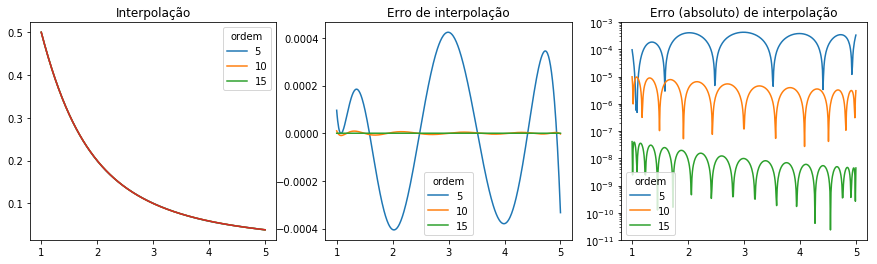

In [12]:
varios_chebyshev(f,1,5,[5,10,15])
plt.show()

Aumentando a ordem de interpolação...

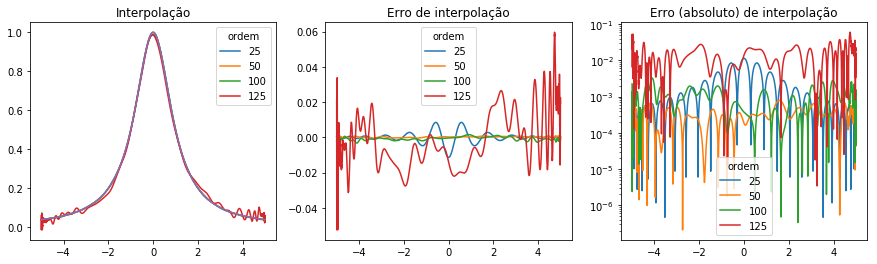

In [13]:
varios_chebyshev(f,-5,5,[25,50,100,125])
plt.show()